In [11]:
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib.colors
import aacgmv2
import numpy as np
import scipy.interpolate
from scipy.interpolate.interpnd import _ndim_coords_from_arrays
from scipy.spatial import cKDTree
try:
    import cartopy.crs as ccrs
    transform=ccrs.PlateCarree()
except ImportError:
    transform=None

import asilib
import asilib.asi
import asilib.map
import asilib.utils

print(f'asilib version: {asilib.__version__}')

asilib version: 0.25.1


In [16]:
time = datetime(2022, 12, 19, 14, 5, 51)
location_codes_RGB = ['FSMI', "YKNF"]
map_alt = 110
min_elevation = 10

In [17]:
_imagers = []

for location_code in location_codes_RGB:
    _imagers.append(asilib.asi.trex.trex_rgb(location_code, time=time, alt=map_alt))
asis = asilib.Imagers(_imagers)

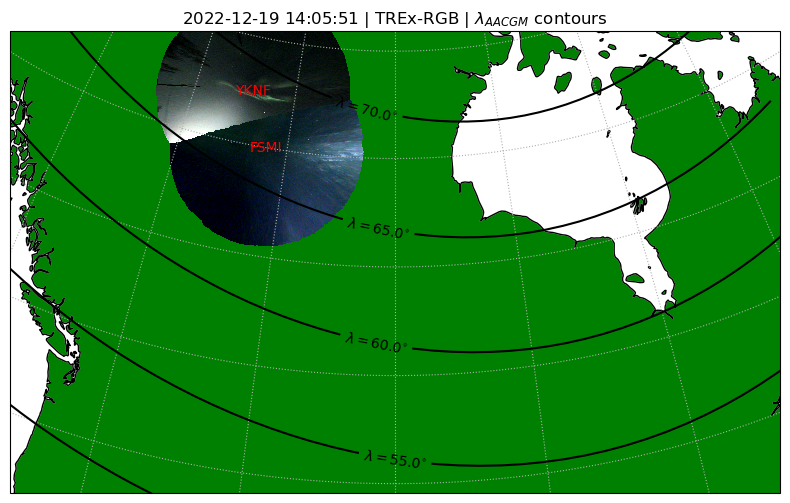

In [18]:
lon_bounds=(-125, -75)
lat_bounds=(43, 64)
lat_grid, lon_grid = np.meshgrid(
    np.linspace(lat_bounds[0]-5, lat_bounds[1]+5),
    np.linspace(lon_bounds[0]-10, lon_bounds[1]+10, num=51)
    )
# Need to pass flattened arrays since aacgmv2 does not work with n-D arrays.
aacgm_lat_grid, aacgm_lon_grid, _ = aacgmv2.wrapper.convert_latlon_arr(
    lat_grid.flatten(), lon_grid.flatten(), 110, time, method_code='G2A'
    )
aacgm_lat_grid = aacgm_lat_grid.reshape(lat_grid.shape)
aacgm_lon_grid = aacgm_lon_grid.reshape(lon_grid.shape)

ax = asilib.map.create_map(lon_bounds=lon_bounds, lat_bounds=lat_bounds)
asis.plot_map(ax=ax, overlap=False, min_elevation=min_elevation)
cs = plt.contour(lon_grid, lat_grid, aacgm_lat_grid, colors='k', transform=transform)
ax.clabel(cs, inline=True, fontsize=10, fmt=lambda x: f'$\lambda = {{{x}}}^{{\circ}}$')
plt.title(f'{time} | TREx-RGB | $\lambda_{{AACGM}}$ contours');